## Simple Linear Regression



### Importing packages

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

### Create our own data

In [2]:
datafile = pd.DataFrame()
datafile[0] = np.arange(2000,2020)
datafile[1] = [50,54,62,78,65,69,72,77,85,98,75,80,82,85,88,75,90,93,95,98]
#datafile[0] = [1,3,5]
datafile1 = pd.DataFrame()
datafile1[0] = np.arange(2000,2020)
#datafile1[1] = [50,54,62,65,68,70,71,74,76,80,82,84,86,90,91,93,94,95,98,100]
datafile1[1] = [50,50,50,50,50,50,50,50,50,50,50,50,50,50,50,50,50,50,50,50]
#datafile[1] = [22,34,50]
datafile.columns =["Year","Placement"]
datafile1.columns =["Year","Placement"]
print(datafile)
print(datafile1)

    Year  Placement
0   2000         50
1   2001         54
2   2002         62
3   2003         78
4   2004         65
5   2005         69
6   2006         72
7   2007         77
8   2008         85
9   2009         98
10  2010         75
11  2011         80
12  2012         82
13  2013         85
14  2014         88
15  2015         75
16  2016         90
17  2017         93
18  2018         95
19  2019         98
    Year  Placement
0   2000         50
1   2001         50
2   2002         50
3   2003         50
4   2004         50
5   2005         50
6   2006         50
7   2007         50
8   2008         50
9   2009         50
10  2010         50
11  2011         50
12  2012         50
13  2013         50
14  2014         50
15  2015         50
16  2016         50
17  2017         50
18  2018         50
19  2019         50


## Checking Linearity


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


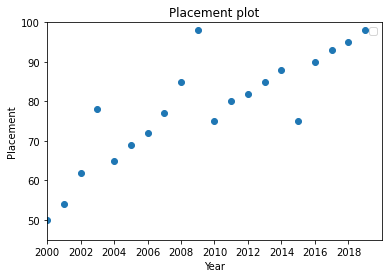

In [3]:
plt.scatter(datafile['Year'],datafile['Placement'])
plt.title("Placement plot")
plt.xlim(2000,2020)
plt.ylim(45,100)
plt.xticks(np.arange(2000,2020,2))
plt.legend()
plt.xlabel("Year")
plt.ylabel("Placement")
plt.show()

<AxesSubplot:>

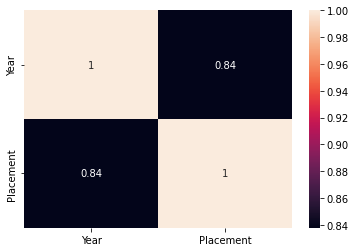

In [4]:
import seaborn as sb
data_corr = datafile.corr()
sb.heatmap(data_corr,annot=True)

### Modeling

In [5]:
from sklearn import linear_model
regress = linear_model.LinearRegression()

train_x = np.asanyarray(datafile[['Year']])
train_y = np.asanyarray(datafile[['Placement']])
#print(train_x)
#print(train_y)

regress.fit (train_x,train_y)
# The coefficients
print ('Coefficients: ', regress.coef_)
print ('Intercept: ',regress.intercept_)

regress1 = linear_model.LinearRegression()
train_x1 = np.asanyarray(datafile1[['Year']])
train_y1 = np.asanyarray(datafile1[['Placement']])
#print(train_x)
#print(train_y)

regress1.fit (train_x1,train_y1)
# The coefficients
print ('Coefficients: ', regress1.coef_)
print ('Intercept: ',regress1.intercept_)

Coefficients:  [[1.94661654]]
Intercept:  [-3833.17593985]
Coefficients:  [[0.]]
Intercept:  [50.]


#### Plot outputs

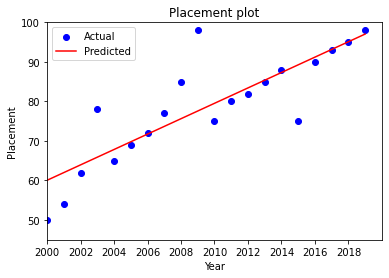

In [6]:
plt.scatter(datafile.Year, datafile.Placement,  color='blue',label="Actual")
plt.plot(train_x, regress.coef_[0][0]*train_x + regress.intercept_[0], '-r',label="Predicted")
plt.title("Placement plot")
plt.xlim(2000,2020)
plt.ylim(45,100)
plt.xticks(np.arange(2000,2020,2))
plt.legend()
plt.xlabel("Year")
plt.ylabel("Placement")
plt.show()

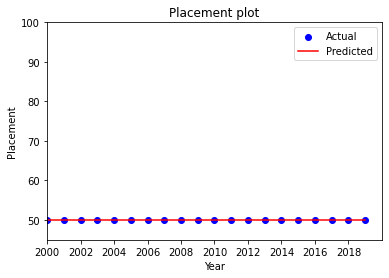

In [7]:
plt.scatter(datafile1.Year, datafile1.Placement,  color='blue',label="Actual")
plt.plot(train_x, regress1.coef_[0][0]*train_x1 + regress1.intercept_[0], '-r',label="Predicted")
plt.title("Placement plot")
plt.xlim(2000,2020)
plt.ylim(45,100)
plt.xticks(np.arange(2000,2020,2))
plt.legend()
plt.xlabel("Year")
plt.ylabel("Placement")
plt.show()

In [8]:
y_predicted = regress.predict(train_x)
for i in range(0,len(train_x)):
    print(train_y[i],y_predicted[i])
datafile['Predicted'] = y_predicted
print(y_predicted)
print(datafile.head())
#datafile.to_csv("E:\\ML Online\\Module 3\\Datasets\\placement.csv")

[50] [60.05714286]
[54] [62.0037594]
[62] [63.95037594]
[78] [65.89699248]
[65] [67.84360902]
[69] [69.79022556]
[72] [71.73684211]
[77] [73.68345865]
[85] [75.63007519]
[98] [77.57669173]
[75] [79.52330827]
[80] [81.46992481]
[82] [83.41654135]
[85] [85.36315789]
[88] [87.30977444]
[75] [89.25639098]
[90] [91.20300752]
[93] [93.14962406]
[95] [95.0962406]
[98] [97.04285714]
[[60.05714286]
 [62.0037594 ]
 [63.95037594]
 [65.89699248]
 [67.84360902]
 [69.79022556]
 [71.73684211]
 [73.68345865]
 [75.63007519]
 [77.57669173]
 [79.52330827]
 [81.46992481]
 [83.41654135]
 [85.36315789]
 [87.30977444]
 [89.25639098]
 [91.20300752]
 [93.14962406]
 [95.0962406 ]
 [97.04285714]]
   Year  Placement  Predicted
0  2000         50  60.057143
1  2001         54  62.003759
2  2002         62  63.950376
3  2003         78  65.896992
4  2004         65  67.843609


In [9]:
y1_predicted = regress1.predict(train_x1)
for i in range(0,len(train_x1)):
    print(train_y1[i],y1_predicted[i])
datafile1['Predicted'] = y1_predicted
print(y1_predicted)
print(datafile1.head())
#datafile.to_csv("E:\\ML Online\\Module 3\\Datasets\\placement.csv")

[50] [50.]
[50] [50.]
[50] [50.]
[50] [50.]
[50] [50.]
[50] [50.]
[50] [50.]
[50] [50.]
[50] [50.]
[50] [50.]
[50] [50.]
[50] [50.]
[50] [50.]
[50] [50.]
[50] [50.]
[50] [50.]
[50] [50.]
[50] [50.]
[50] [50.]
[50] [50.]
[[50.]
 [50.]
 [50.]
 [50.]
 [50.]
 [50.]
 [50.]
 [50.]
 [50.]
 [50.]
 [50.]
 [50.]
 [50.]
 [50.]
 [50.]
 [50.]
 [50.]
 [50.]
 [50.]
 [50.]]
   Year  Placement  Predicted
0  2000         50       50.0
1  2001         50       50.0
2  2002         50       50.0
3  2003         50       50.0
4  2004         50       50.0


#### Performance measurement
Any of the following metrics may be used:
<ul>
    <li> Mean absolute error: It is the average of the absolute value of all the errors. </li>
    <li> Mean Squared Error (MSE): Mean Squared Error (MSE) is the mean of the squared error. This is efficient since the focus is on large errors and doesnot consider sign of error.</li>
    <li> Root Mean Squared Error (RMSE): This is a metric to calculate the accuracy of the model. It represents how close the data are to the fitted regression line. The higher the R-squared, the better the model fits your data. Best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse).</li>
</ul>

In [10]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(train_y, y_predicted))
print('Mean Squared Error:', metrics.mean_squared_error(train_y, y_predicted))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(train_y, y_predicted)))

Mean Absolute Error: 4.712330827067649
Mean Squared Error: 53.55274436090157
Root Mean Squared Error: 7.317974061234541


In [11]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(train_y1, y1_predicted))
print('Mean Squared Error:', metrics.mean_squared_error(train_y1, y1_predicted))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(train_y1, y1_predicted)))

Mean Absolute Error: 0.0
Mean Squared Error: 0.0
Root Mean Squared Error: 0.0


In [12]:
from sklearn.metrics import r2_score

test_x = np.asanyarray(datafile[['Year']])
test_y = np.asanyarray(datafile[['Placement']])
test_y_predicted = regress.predict(test_x)

print("Mean absolute error (MAE):" , np.mean(np.absolute(test_y_predicted - test_y)))
print("Mean square error (MSE): " , np.mean((test_y_predicted - test_y) ** 2))
print("R2-score: %.2f (RMSE):" , r2_score(test_y, test_y_predicted) )

Mean absolute error (MAE): 4.712330827067649
Mean square error (MSE):  53.55274436090157
R2-score: %.2f (RMSE): 0.7017349483512633


In [13]:
from sklearn.metrics import r2_score

test_x1 = np.asanyarray(datafile1[['Year']])
test_y1 = np.asanyarray(datafile1[['Placement']])
test_y1_predicted = regress1.predict(test_x1)

print("Mean absolute error (MAE):" , np.mean(np.absolute(test_y1_predicted - test_y1)))
print("Mean square error (MSE): " , np.mean((test_y1_predicted - test_y1) ** 2))
print("R2-score: %.2f (RMSE):" , r2_score(test_y1, test_y1_predicted) )

Mean absolute error (MAE): 0.0
Mean square error (MSE):  0.0
R2-score: %.2f (RMSE): 1.0


# Using training and testing data

In [14]:
from sklearn.model_selection import train_test_split

train_x, test_x, train_y, test_y = train_test_split(datafile[['Year']], datafile[['Placement']], test_size=0.30, random_state=42)
print(train_x)
print("Testing")
print(test_x)

from sklearn import linear_model
regress = linear_model.LinearRegression()
regress.fit (train_x,train_y)
# The coefficients
print ('Coefficients: ', regress.coef_)
print ('Intercept: ',regress.intercept_)

    Year
11  2011
3   2003
18  2018
16  2016
13  2013
2   2002
9   2009
19  2019
4   2004
12  2012
7   2007
10  2010
14  2014
6   2006
Testing
    Year
0   2000
17  2017
15  2015
1   2001
8   2008
5   2005
Coefficients:  [[1.70675575]]
Intercept:  [-3349.2809948]


In [15]:
y_predicted = regress.predict(test_x)
print(test_x)
print(test_y)
print(y_predicted)
#for i in range(0,len(test_y)):
  #  print(test_y[i],y_predicted[i])
#datafile['Predicted1'] = y_predicted

#print(datafile.head())
#datafile.to_csv("E:\\ML Online\\Module 3\\Datasets\\placement.csv")

    Year
0   2000
17  2017
15  2015
1   2001
8   2008
5   2005
    Placement
0          50
17         93
15         75
1          54
8          85
5          69
[[64.23051225]
 [93.24536006]
 [89.83184855]
 [65.937268  ]
 [77.88455828]
 [72.76429102]]


In [16]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(test_y, y_predicted))
print('Mean Squared Error:', metrics.mean_squared_error(test_y, y_predicted))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(test_y, y_predicted)))

Mean Absolute Error: 8.687453600594003
Mean Squared Error: 104.9748628433119
Root Mean Squared Error: 10.245724124887996


In [17]:
from sklearn.model_selection import cross_val_score
accuracy = cross_val_score(regress, datafile[['Year']], datafile[['Placement']], cv = 5,scoring='r2')
print(accuracy)

[-0.00562185  0.73731733 -1.08086996 -2.00601522  0.92745586]


In [18]:
import sklearn
print(sklearn.metrics.SCORERS.keys())

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'top_k_accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_wei